In [35]:
import pandas as pd
import itertools as it
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [36]:
test = pd.read_csv("training_sample.csv")
sim_df = pd.DataFrame(columns=test.columns, index=test.columns)

In [37]:
from scipy.spatial import distance
for col_pair in it.combinations(test.columns, 2):
    sim_df.loc[col_pair] = sim_df.loc[tuple(reversed(col_pair))] = distance.jaccard(test[col_pair[0]], test[col_pair[1]])

In [38]:
sim_df

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
UserID,NaN,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
basket_icon_click,1,NaN,0.660513,0.593206,0.93945,0.944255,0.986436,0.947699,0.988884,0.779474,...,0.999095,0.983259,0.995865,0.830875,0.901776,0.930559,0.943704,0.872072,0.899931,0.732045
basket_add_list,1,0.660513,NaN,0.756081,0.922269,0.952452,0.990691,0.948892,0.992801,0.706948,...,0.999325,0.987307,0.996825,0.865955,0.931191,0.935847,0.943066,0.915689,0.924461,0.813965
basket_add_detail,1,0.593206,0.756081,NaN,0.933945,0.928152,0.99037,0.949665,0.988303,0.792649,...,0.999166,0.98489,0.996676,0.832191,0.897032,0.907377,0.936981,0.879815,0.885091,0.749468
sort_by,1,0.93945,0.922269,0.933945,NaN,0.883646,0.999456,0.961221,0.990054,0.926279,...,0.998997,0.985709,0.996923,0.929079,0.999075,0.866311,0.937961,0.962464,0.965906,0.952003
image_picker,1,0.944255,0.952452,0.928152,0.883646,NaN,0.99913,0.966549,0.984218,0.954308,...,0.998946,0.983542,0.997231,0.956442,0.999314,0.897101,0.958675,0.973558,0.975155,0.947383
account_page_click,1,0.986436,0.990691,0.99037,0.999456,0.99913,NaN,0.99149,0.991557,0.99464,...,0.997219,0.973788,0.987613,0.989586,0.994855,0.999511,0.9991,0.995519,0.996453,0.981317
promo_banner_click,1,0.947699,0.948892,0.949665,0.961221,0.966549,0.99149,NaN,0.984852,0.962362,...,0.99947,0.985039,0.994641,0.97003,0.986728,0.976153,0.983024,0.981751,0.984456,0.962333
detail_wishlist_add,1,0.988884,0.992801,0.988303,0.990054,0.984218,0.991557,0.984852,NaN,0.992384,...,0.999437,0.991192,0.995692,0.993419,0.99689,0.994809,0.996256,0.995773,0.996663,0.990536
list_size_dropdown,1,0.779474,0.706948,0.792649,0.926279,0.954308,0.99464,0.962362,0.992384,NaN,...,0.999572,0.990775,0.997947,0.726324,0.794922,0.888324,0.89301,0.767713,0.773688,0.908931


In [39]:
# sim_df.to_csv(r'correlation.csv', index = True)

In [40]:
dropped = sim_df.drop(['UserID'])
dropped = dropped.drop(['UserID'], axis=1)

In [41]:
nareplaced = dropped.fillna(1)

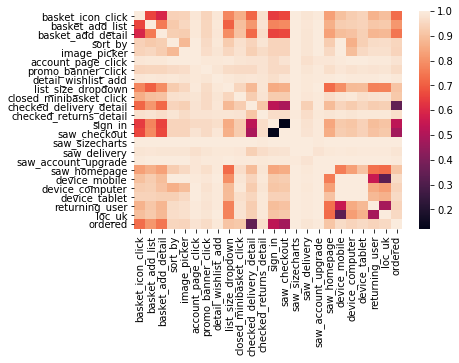

In [42]:
sn.heatmap(nareplaced, xticklabels=True, yticklabels=True)

In [43]:
# Information below is my testing; This wasn't part of Heather's example.
# Only focused on correlation of web usage for users who've actually ordered. 

In [44]:
ordered_test = pd.read_csv("training_sample_ordered_only.csv")
o_sim_df = pd.DataFrame(columns=ordered_test.columns, index=ordered_test.columns)

In [45]:
from scipy.spatial import distance
for col_pair in it.combinations(ordered_test.columns, 2):
    o_sim_df.loc[col_pair] = o_sim_df.loc[tuple(reversed(col_pair))] = distance.jaccard(ordered_test[col_pair[0]], ordered_test[col_pair[1]])
o_sim_df

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
UserID,NaN,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
basket_icon_click,1,NaN,0.534569,0.431435,0.905902,0.921191,0.977434,0.939142,0.98921,0.445289,...,0.998748,0.981456,0.994116,0.443156,0.471591,0.789022,0.851121,0.437555,0.305761,0.288902
basket_add_list,1,0.534569,NaN,0.681025,0.879275,0.925394,0.977668,0.934917,0.990991,0.313945,...,0.998799,0.982326,0.993784,0.588243,0.67916,0.788254,0.847191,0.647769,0.570828,0.564343
basket_add_detail,1,0.431435,0.681025,NaN,0.907668,0.903334,0.980606,0.94238,0.988559,0.557801,...,0.998726,0.982103,0.9947,0.473074,0.516768,0.728805,0.859269,0.500941,0.275472,0.260095
sort_by,1,0.905902,0.879275,0.907668,NaN,0.834606,0.997025,0.947879,0.986203,0.890256,...,0.998194,0.969538,0.990145,0.897242,0.991262,0.796962,0.89052,0.922594,0.917449,0.913948
image_picker,1,0.921191,0.925394,0.903334,0.834606,NaN,0.996902,0.953131,0.981449,0.918966,...,0.998736,0.972146,0.992116,0.908414,0.992324,0.789211,0.916547,0.930392,0.920524,0.918138
account_page_click,1,0.977434,0.977668,0.980606,0.997025,0.996902,NaN,0.981777,0.989437,0.976731,...,0.994987,0.979562,0.985169,0.970654,0.966816,0.996578,0.994595,0.980665,0.979998,0.980097
promo_banner_click,1,0.939142,0.934917,0.94238,0.947879,0.953131,0.981777,NaN,0.97878,0.937835,...,0.998981,0.985737,0.994307,0.943413,0.953236,0.951529,0.95893,0.950064,0.950428,0.949667
detail_wishlist_add,1,0.98921,0.990991,0.988559,0.986203,0.981449,0.989437,0.97878,NaN,0.988779,...,0.995327,0.996086,0.996575,0.988204,0.990406,0.986617,0.992673,0.989862,0.99008,0.989839
list_size_dropdown,1,0.445289,0.313945,0.557801,0.890256,0.918966,0.976731,0.937835,0.988779,NaN,...,0.998938,0.981674,0.994031,0.513623,0.593858,0.80047,0.836653,0.560435,0.466695,0.457917


In [46]:
o_dropped = o_sim_df.drop(['UserID'])
o_dropped = o_dropped.drop(['UserID'], axis=1)

In [47]:
o_nareplaced = o_dropped.fillna(1)

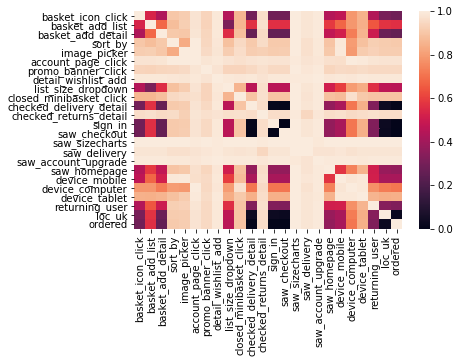

In [48]:
sn.heatmap(o_nareplaced, xticklabels=True, yticklabels=True)